<a href="https://colab.research.google.com/github/fernandodeeke/epidemias/blob/main/sir_bifurcation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

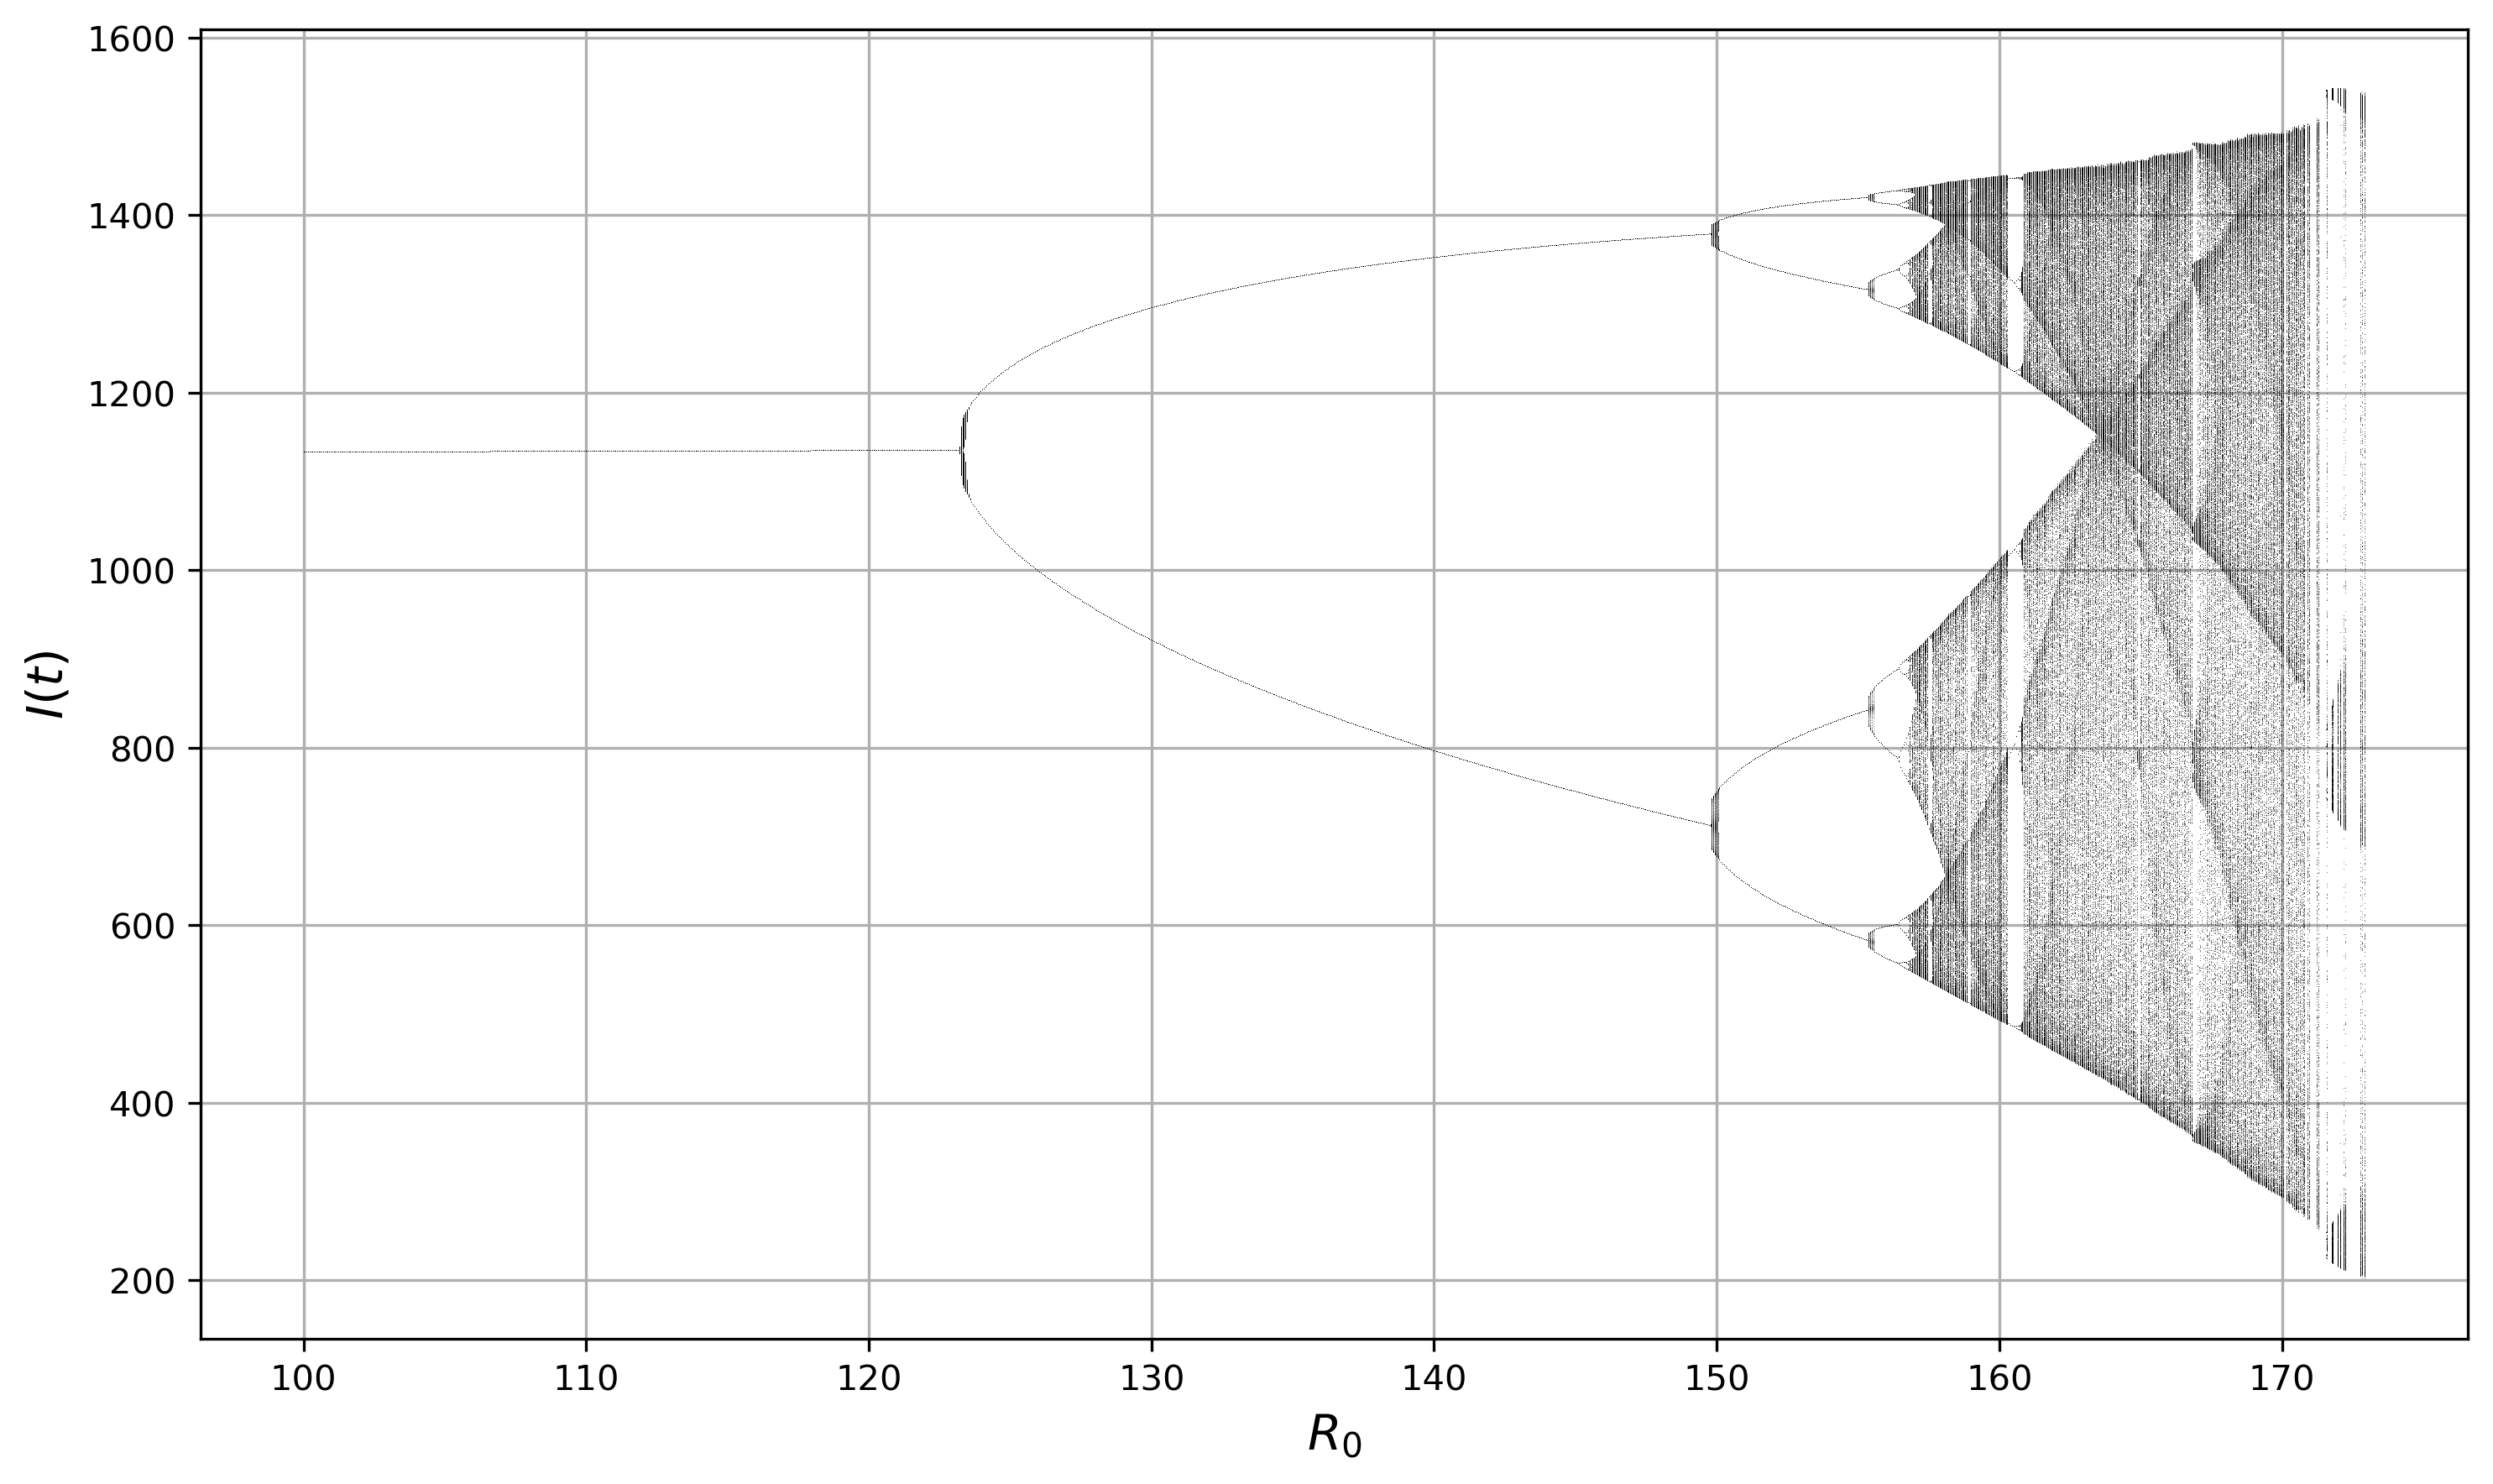

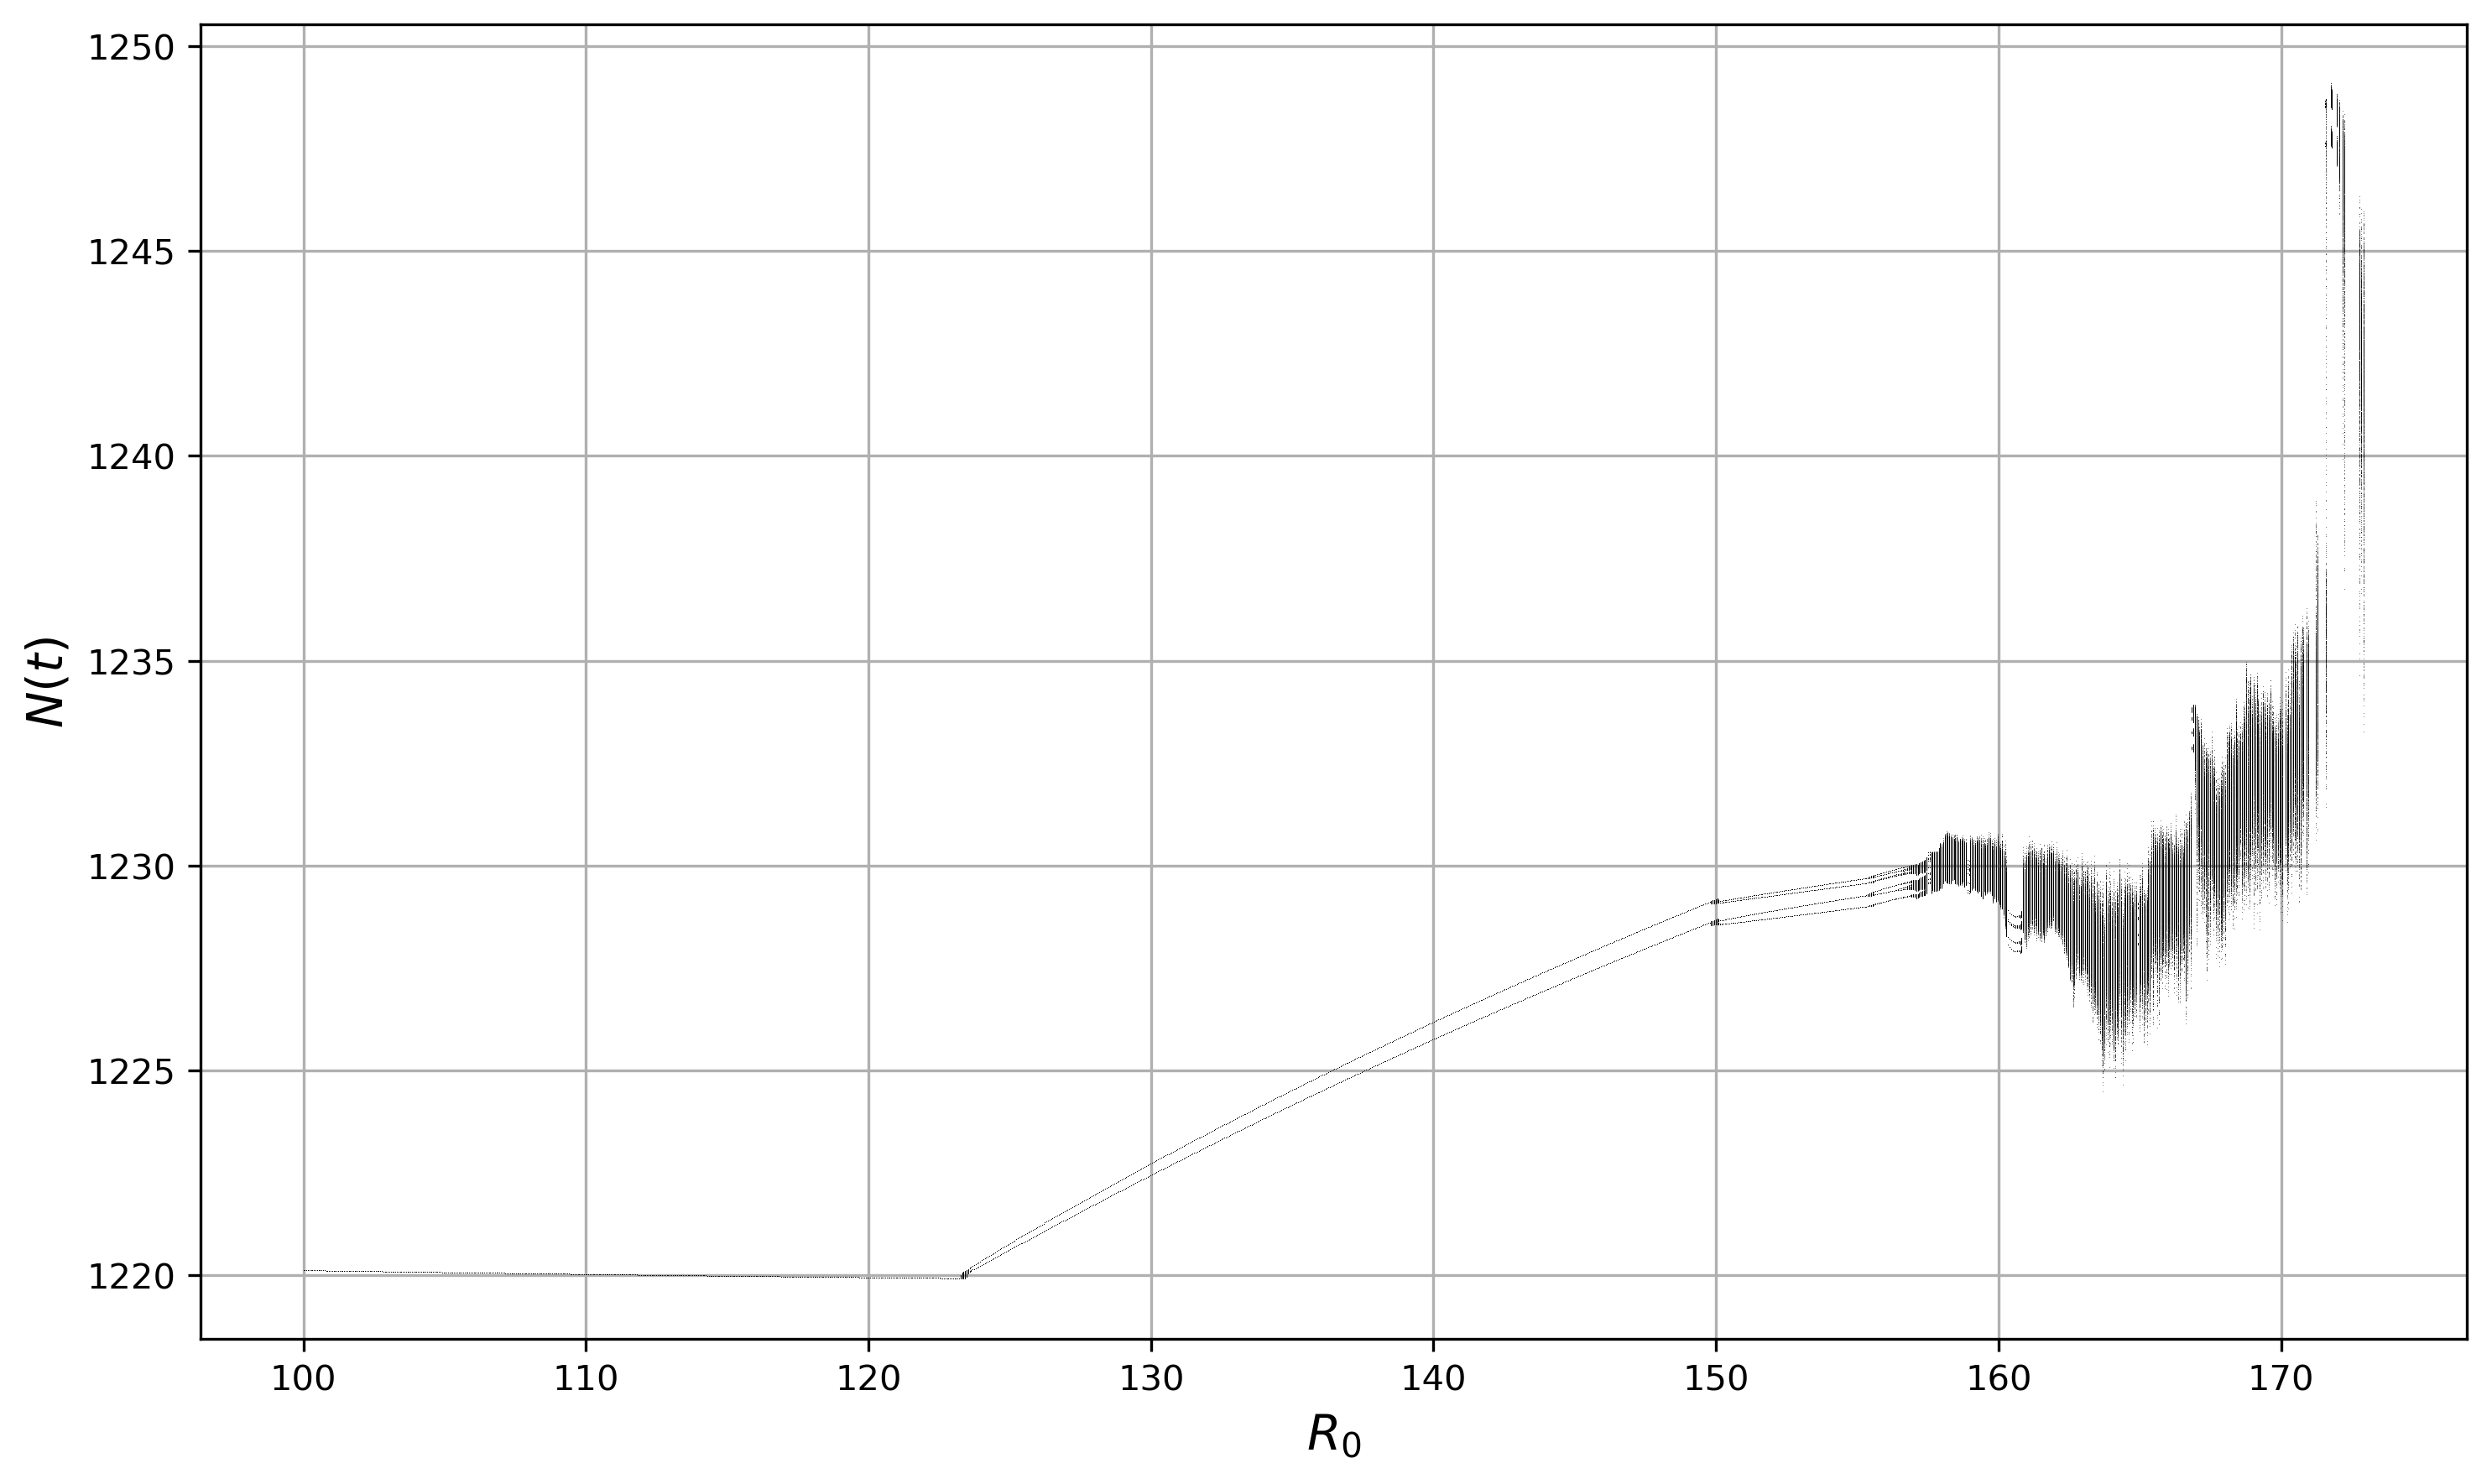

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações para gráficos em alta resolução
plt.rcParams['figure.dpi'] = 300

# Parâmetros fixos
S0 = 10000
I0 = 100
R0_init = 0
Lambda = 20
nu = 0.0
mu = 0.015
alpha = 0.0015
gamma = 0.001
n_total = 3000
n_discard = 1500

# Intervalo de R0
R0_range = np.linspace(100, 260, 3000)

R0_vals_I, I_vals = [], []
R0_vals_N, N_vals = [], []

for R0_value in R0_range:
    denom = gamma + mu + alpha
    beta = R0_value * denom

    S = np.zeros(n_total + 1)
    I = np.zeros(n_total + 1)
    R = np.zeros(n_total + 1)
    N = np.zeros(n_total + 1)

    S[0] = S0
    I[0] = I0
    R[0] = R0_init
    N[0] = S[0] + I[0] + R[0]

    overflow = False
    for k in range(n_total):
        if N[k] <= 0 or np.isnan(N[k]) or np.isinf(N[k]):
            overflow = True
            break
        S[k + 1] = S[k] + Lambda + nu * N[k] - beta * S[k] * I[k] / N[k] - mu * S[k]
        I[k + 1] = I[k] + beta * S[k] * I[k] / N[k] - (gamma + mu + alpha) * I[k]
        R[k + 1] = R[k] + gamma * I[k] - mu * R[k]
        N[k + 1] = S[k + 1] + I[k + 1] + R[k + 1]
        if any(np.isnan([S[k+1], I[k+1], R[k+1], N[k+1]])) or any(x > 1e8 for x in [S[k+1], I[k+1], R[k+1]]):
            overflow = True
            break

    if not overflow:
        R0_vals_I.extend([R0_value] * (n_total - n_discard))
        I_vals.extend(I[n_discard:n_total])
        R0_vals_N.extend([R0_value] * (n_total - n_discard))
        N_vals.extend(N[n_discard:n_total])

# Gráfico R0 x I*
plt.figure(figsize=(10, 6))
plt.plot(R0_vals_I, I_vals, ',k', alpha=0.5)
plt.xlabel(r"$R_0$", fontsize=14)
plt.ylabel(r"$I(t)$", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("bifurcation_R0_I.png", dpi=300)
plt.show()

# Gráfico R0 x N*
plt.figure(figsize=(10, 6))
plt.plot(R0_vals_N, N_vals, ',k', alpha=0.5)
plt.xlabel(r"$R_0$", fontsize=14)
plt.ylabel(r"$N(t)$", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.savefig("bifurcation_R0_N.png", dpi=300)
plt.show()